In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from sklearn import linear_model
from sklearn import svm

In [3]:
# Leer archivo de datos
df = pd.read_excel('precios.xlsx')

# Convertir el string de la fecha a datetime
df['fecha'] = pd.to_datetime(df['fecha'])
# Hacer la fecha un valor ordinal para poder usar SVR
df['fecha'] = df['fecha'].map(dt.datetime.toordinal)

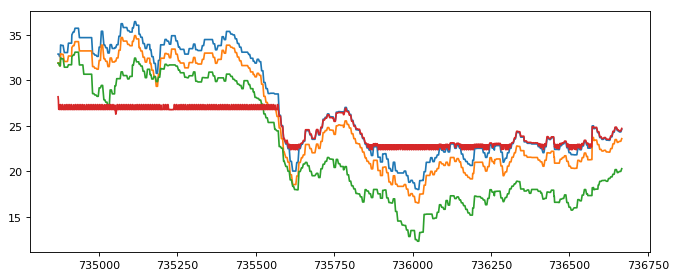

Precio para 2018-01-11: [ 24.85239358]


In [8]:
# Crera modelo SVR con el kernel rbf para tener un mejor ajuste
clf = svm.SVR(kernel='rbf', C=1.4)

# El modelo se entrena para el tipo super
clf.fit(df[['fecha']], df['super'].values.ravel())

# Trazar la linea de predict para comparar el modelo
df['pred_super'] = clf.predict(df[['fecha']])


fig=plt.figure(figsize=(10, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(df[['fecha']], df[['super']])
plt.plot(df[['fecha']], df[['regular']])
plt.plot(df[['fecha']], df[['diesel']])
plt.plot(df[['fecha']], df[['pred_super']])
plt.show()

# Mostrar la predicción para el día actual
# Se puede comparar el precio en http://www.mem.gob.gt/hidrocarburos/precios-combustible-nacionales/
hoy = dt.date.today()
print('Precio para {}: {}'.format(hoy, clf.predict(dt.datetime.toordinal(hoy))))